In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, List
import operator

In [2]:
class BatsmanState(TypedDict):

    runs:int
    balls:int
    fours:int
    sixes:int

    sr: Annotated[List[float], operator.add]  # reducer for parallel updates
    bpb: Annotated[List[float], operator.add]
    boundry_percent: Annotated[List[float], operator.add]
    summary: str

In [3]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs'] / state['balls']) / 100
    return {'sr': [sr]}

In [4]:
def calculate_bpb(state:BatsmanState):

    bpb=(state['balls']/(state['fours']+state['sixes']))/100

    return {'bpb':[bpb]}

In [5]:
def calculate_boundry_percent(state:BatsmanState):

    boundry_percent=(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100

    return {'boundry_percent':[boundry_percent]}

In [6]:
def summary(state:BatsmanState):
    
    summary = f"""
    Strike Rate - {state['sr']} \n
    Balls per boundry - {state['bpb']} \n
    Boundry Percent - {state['boundry_percent']}
    """
    state['summary'] = summary

    return state

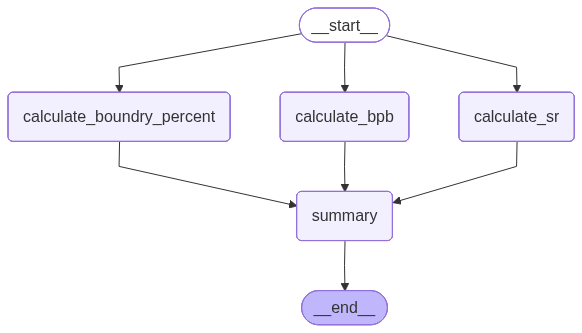

In [7]:
graph=StateGraph(BatsmanState)

#nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundry_percent',calculate_boundry_percent)
graph.add_node('summary',summary)

#edges
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundry_percent')
graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundry_percent', 'summary')
graph.add_edge('summary', END)

graph.compile()

In [8]:
workflow=graph.compile()

In [9]:
initial_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
}

workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': [0.02, 0.02],
 'bpb': [0.05, 0.05],
 'boundry_percent': [48.0, 48.0],
 'summary': '\n    Strike Rate - [0.02] \n\n    Balls per boundry - [0.05] \n\n    Boundry Percent - [48.0]\n    '}